In [1]:
import drjit as dr
import numpy as np
import mitsuba as mi 
mi.set_variant("cuda_ad_rgb")
import matplotlib.pyplot as plt
from PDE2D.Coefficient import *
from PDE2D.utils import *
import matplotlib.patches as patches
from PDE2D.Solver import DataHolder
from PDE2D.BoundaryShape import *
from mitsuba import Point2f, Float, UInt, TensorXf
dis_tex_res = 512
origin = [0,0]
radius = 1
thickness = 0.05
res = 64
i_radius = radius - thickness
resolution = [512, 512]
bbox = [[origin[0] - radius * 1.1, origin[1] - radius * 1.1],
        [origin[0] + radius * 1.1, origin[1] + radius * 1.1]]
origin_s = point2sketch(Point2f(origin), bbox, resolution)
radius_x, radius_y, _ = dist2sketch(radius, bbox, resolution)
i_radius_x, i_radius_y, _ = dist2sketch(i_radius, bbox, resolution)

image1 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0],
                  [0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 8, 0, 0],
                  [0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
                  [0, 8, 3, 8, 8, 8, 0, 0, 0, 1, 7, 0, 8, 0, 0, 0],
                  [0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 7, 0, 8, 0, 0, 0],
                  [0, 0, 0, 8, 0, 5, 0, 0, 0, 0, 7, 1, 0, 7, 0, 0],
                  [0, 0, 0, 8, 8, 6, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0],
                  [0, 0, 3, 6, 0, 0, 0, 0, 0, 0, 0, 1, 8, 0, 0, 0],
                  [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
                  [0, 0, 0, 1, 1, 1, 1, 0, 8, 8, 1, 0, 0, 8, 0, 0],
                  [0, 0, 0, 3, 1, 0, 0, 2, 4, 3, 0, 1, 0, 8, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

image2 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
out_val = 1
image = image2 + out_val
#image = np.ones([res, res]) *50
α = DiskTextureCoefficient("diffusion", image, radius = radius, constant_thickness= thickness, origin = origin, out_val = out_val)
#α = TextureCoefficient("diffusion", bbox, image)
σ = ConstantCoefficient("screening", 0)
f = ConstantCoefficient("source", 0)
shape = CircleShape(radius = 1)
data_holder = DataHolder(α = α, shape = shape, max_mipmap_res = 4096, min_mipmap_res= 1, max_window_grid=64, dist_texture_res = dis_tex_res)

In [2]:
data_holder.create_accelaration()

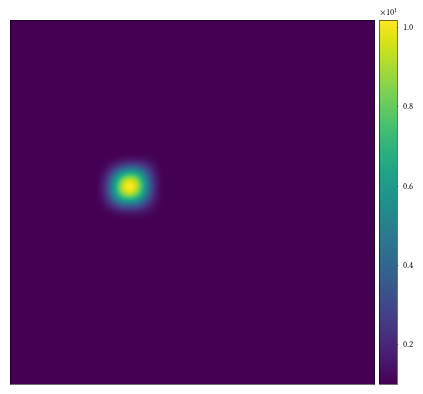

In [3]:
fig, (ax)  = plt.subplots(1,1, figsize = (5,5))
α.visualize(ax, bbox = bbox, resolution = resolution);

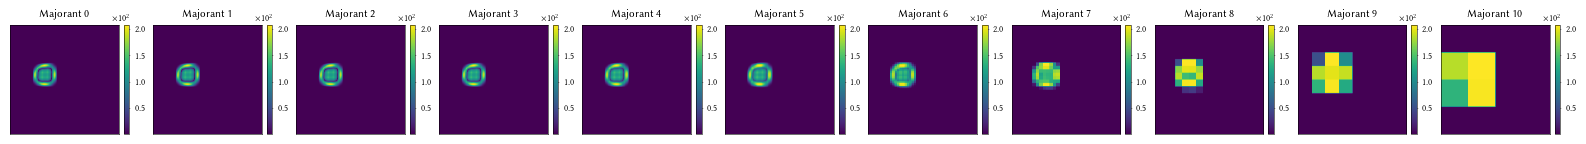

In [4]:
n = 0
fig, axs = plt.subplots(1,11, figsize = (20,5))
for i, ax in enumerate(axs):
    plot_image(data_holder.σ_mipmap[i].numpy(), ax)
    ax.set_title(f"Majorant {i}")

Text(0.5, 1.0, 'Majorants (Final)')

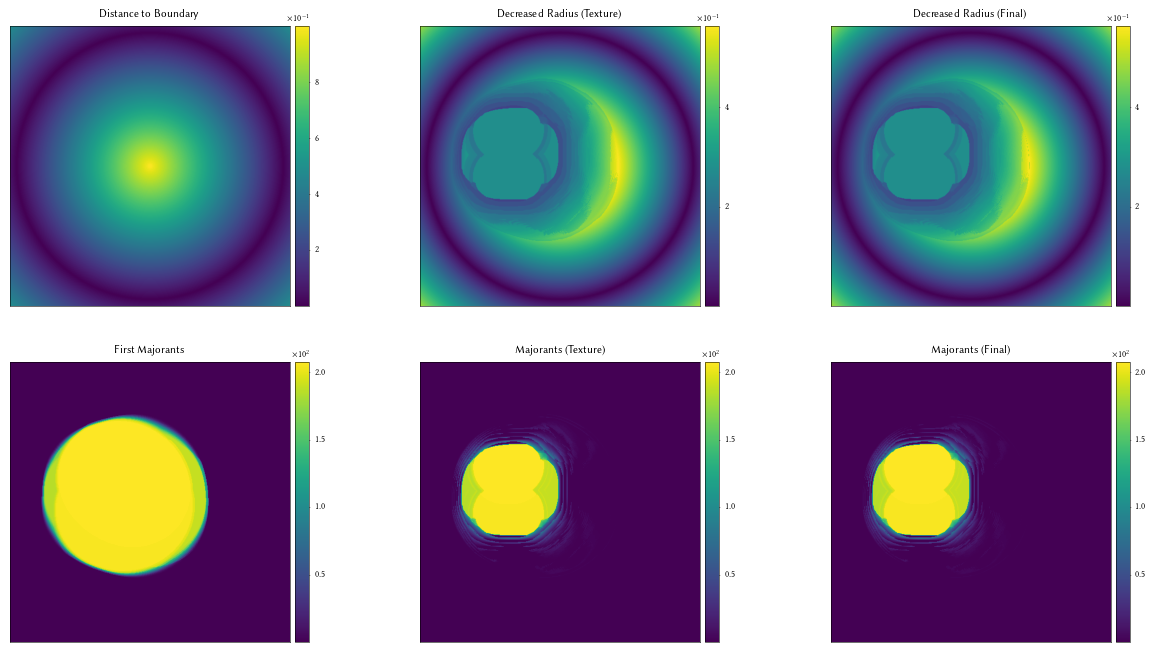

In [5]:
fig, ax = plt.subplots(2,3, figsize = (15, 8))
resolution = [2048, 2048]
points = create_image_points(data_holder.bbox, resolution = resolution, spp = 1, centered = True)
bi = data_holder.shape.boundary_interaction(points = points, star_generation = False)
r, σ, z = data_holder.get_Rσz(points, Float(bi.r))

d_image, _ = create_image_from_result(bi.r, resolution) 
r_best = data_holder.r_best_tex.get_value(points)
r_best_image, _ = create_image_from_result(r_best, resolution)
r_image, _ = create_image_from_result(r, resolution)

σ_begin = data_holder.σ_begin_tex.get_value(points)
σ_begin_image, _ = create_image_from_result(σ_begin, resolution)
σ_best = data_holder.σ_best_tex.get_value(points)
σ_best_image, _ = create_image_from_result(σ_best, resolution)
σ_image, _ = create_image_from_result(σ_best, resolution)

plot_image(d_image[0], ax[0][0])
plot_image(r_best_image[0], ax[0][1])
plot_image(r_image[0], ax[0][2])

plot_image(σ_begin_image[0], ax[1][0])
plot_image(σ_best_image[0], ax[1][1])
plot_image(σ_image[0], ax[1][2])

ax[0][0].set_title("Distance to Boundary")
ax[0][1].set_title("Decreased Radius (Texture)")
ax[0][2].set_title("Decreased Radius (Final)")

ax[1][0].set_title("First Majorants")
ax[1][1].set_title("Majorants (Texture)")
ax[1][2].set_title("Majorants (Final)")

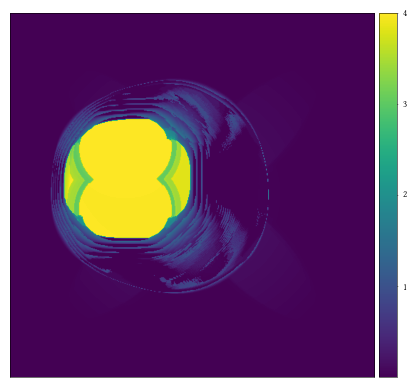

In [6]:
z_image, _ = create_image_from_result(z, resolution)
fig, ax = plt.subplots(1,1, figsize= (5,5))
plot_image(z_image[0], ax)

Text(0.5, 1.0, 'Last, avg = 0.199')

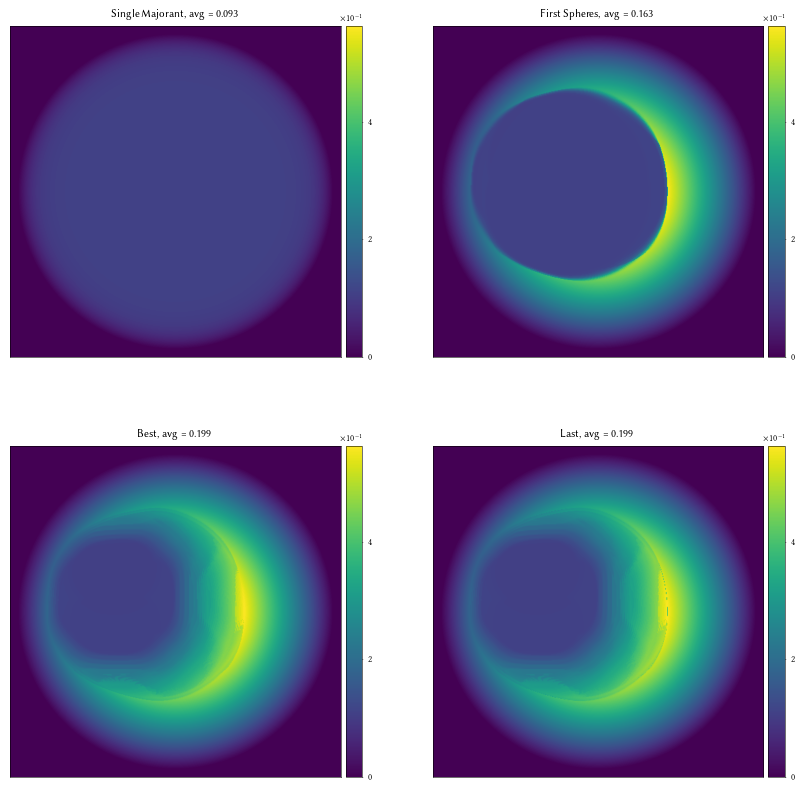

In [7]:
mfp_constant = data_holder.get_mean_free_path(bi.r, np.max(σ_begin_image)) 
mfp_begin = data_holder.get_mean_free_path(bi.r, σ_begin) 
mfp_best = data_holder.get_mean_free_path(r_best, σ_best)
mfp_last = data_holder.get_mean_free_path(r, σ)

active = data_holder.shape.inside_closed_surface_mask(points)

mfp_constant = dr.select(active, mfp_constant, 0)
mfp_begin = dr.select(active, mfp_begin, 0)
mfp_best = dr.select(active, mfp_best, 0)
mfp_last = dr.select(active, mfp_last, 0)

mfp_constant_image, _ = create_image_from_result(mfp_constant, resolution)
mfp_begin_image, _ = create_image_from_result(mfp_begin, resolution)
mfp_best_image, _ = create_image_from_result(mfp_best, resolution)
mfp_last_image, _ = create_image_from_result(mfp_last, resolution)

max_mfp = np.max(np.array([np.max(mfp_constant_image), np.max(mfp_begin_image), 
                           np.max(mfp_best_image), np.max(mfp_last_image)]))

fig, ((ax1,ax2), (ax3, ax4)) = plt.subplots(2,2,figsize = (10, 10))
plot_image(mfp_constant_image[0], ax1, input_range = [0, max_mfp])
plot_image(mfp_begin_image[0], ax2, input_range = [0, max_mfp])
plot_image(mfp_best_image[0], ax3, input_range = [0, max_mfp])
plot_image(mfp_last_image[0], ax4, input_range = [0, max_mfp])

avg_mfp_constant = mfp_constant_image.sum() / (mfp_constant_image!=0).sum()
avg_mfp_begin    = mfp_begin_image.sum() / (mfp_begin_image!=0).sum()
avg_mfp_best     = mfp_best_image.sum() / (mfp_best_image!=0).sum()
avg_mfp_last     = mfp_last_image.sum() / (mfp_last_image!=0).sum()


ax1.set_title(f"Single Majorant, avg = {avg_mfp_constant :.3f}")
ax2.set_title(f"First Spheres, avg = {avg_mfp_begin :.3f}")
ax3.set_title(f"Best, avg = {avg_mfp_best :.3f}")
ax4.set_title(f"Last, avg = {avg_mfp_last :.3f}")

Text(0.5, 1.0, 'Sphere Screening = 76.64')

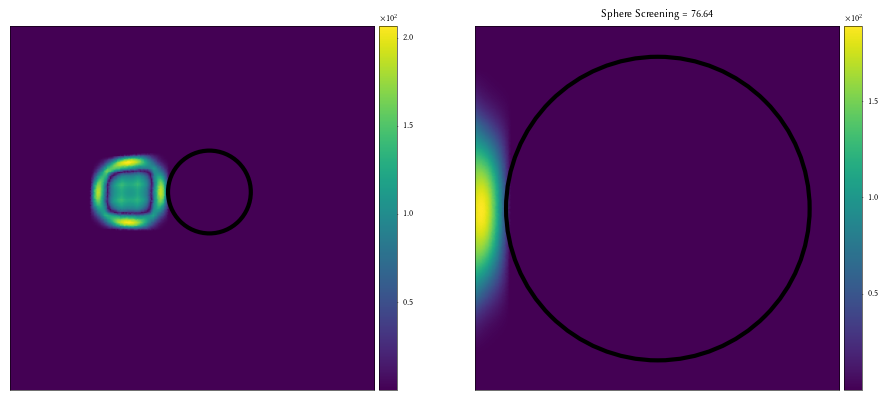

In [8]:
point = [0.1, 0.1]
radius = 0.25
resolution = [256, 256]
box_rate = 1.2
bbox_sphere = [[point[0] - radius * box_rate, point[1] - radius * box_rate],
               [point[0] + radius * box_rate, point[1] + radius * box_rate]]

fig, (ax1, ax2)  = plt.subplots(1,2, figsize = (11,5))

data_holder.majorant_tex.visualize(ax1, bbox, resolution);
radius_x1, radius_y1, _ = dist2sketch(radius, bbox, resolution)
point_p1 = point2sketch(point, bbox, resolution)
sphere1 = patches.Ellipse(point_p1, radius_x1 * 2, radius_y1 * 2, linewidth= 3, fill = False)
ax1.add_patch(sphere1)


data_holder.majorant_tex.visualize(ax2, bbox_sphere, resolution);
radius_x2, radius_y2, _ = dist2sketch(radius, bbox_sphere, resolution)
point_p2 = point2sketch(point, bbox_sphere, resolution)
sphere2 = patches.Ellipse(point_p2, radius_x2 * 2, radius_y2 * 2, linewidth= 3, fill = False)
ax2.add_patch(sphere2)

screening = data_holder.get_sphere_screening(point, radius)
ax2.set_title(f"Sphere Screening = {screening[0]:.2f}")